In [10]:
#CORRELATION ANALYSIS (which features are most linearly related to the occurrence of fraud)
#PEARSON CORRELATION COEFFICIENT

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('formatted_fraud_detection_data.csv')

In [4]:
correlation_matrix = data.corr()

correlation_with_isFraud = correlation_matrix['isFraud']

sorted_correlations = correlation_with_isFraud.sort_values(ascending=False)

print(sorted_correlations)

isFraud           1.000000
amount            0.076688
type_TRANSFER     0.053869
isFlaggedFraud    0.044109
step              0.031578
nameOrig          0.020752
type_CASH_OUT     0.011256
nameDest          0.000242
type_DEBIT       -0.002911
type_CASH_IN     -0.019089
type_PAYMENT     -0.025697
Name: isFraud, dtype: float64


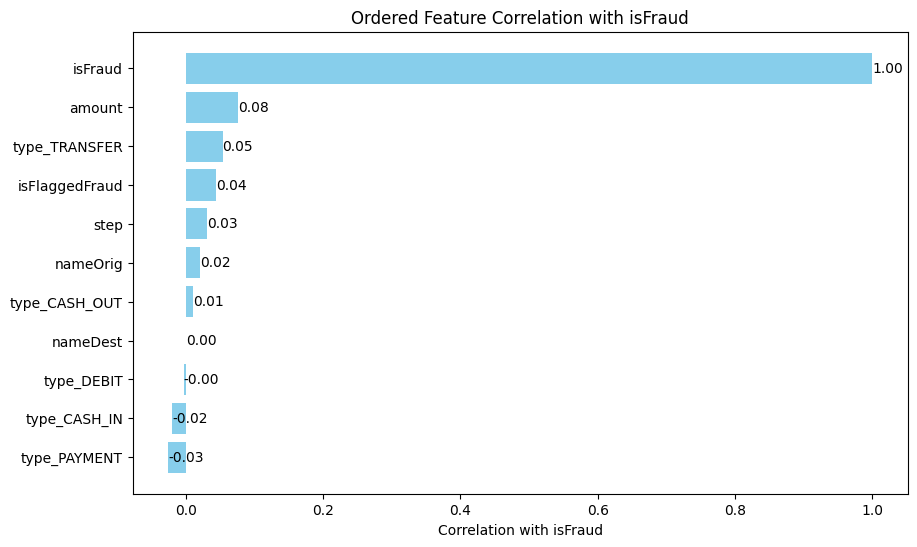

In [5]:
# Convert the correlation series to a DataFrame for easier plotting
correlation_with_isFraud = data.corr()['isFraud'].sort_values(ascending=False)

# Convert to DataFrame for easier plotting
correlation_df = correlation_with_isFraud.reset_index()
correlation_df.columns = ['Feature', 'Correlation with isFraud']

# Sort the DataFrame by 'Correlation with isFraud' in descending order
correlation_df = correlation_df.sort_values(by='Correlation with isFraud', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(correlation_df['Feature'], correlation_df['Correlation with isFraud'], color='skyblue')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest values at the top

# Add labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.2f}', 
             va='center')

plt.xlabel('Correlation with isFraud')
plt.title('Ordered Feature Correlation with isFraud')
plt.show()

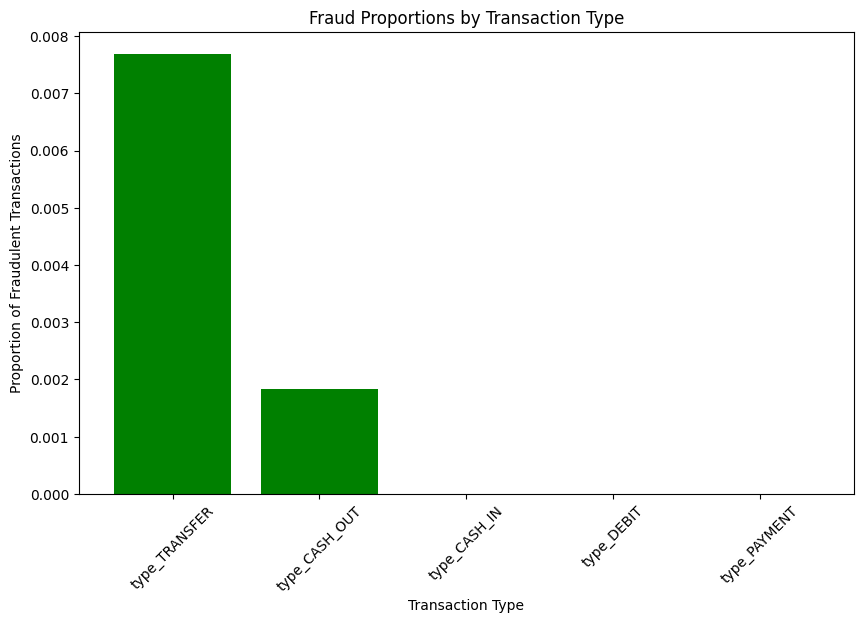

In [17]:
#TRANSACTIONTYPES ANALYSIS (examine the frequency of fraudulent transactions within each transaction type)

# Identifying transaction type columns
transaction_types = ['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

# Calculating fraud proportions for each transaction type
fraud_proportions = {}
for transaction_type in transaction_types:
    total_transactions = data[transaction_type].sum()
    fraudulent_transactions = data[data[transaction_type] == 1]['isFraud'].sum()
    fraud_proportions[transaction_type] = fraudulent_transactions / total_transactions if total_transactions > 0 else 0

# Converting to a DataFrame for easier plotting
fraud_proportions_df = pd.DataFrame(list(fraud_proportions.items()), columns=['Transaction Type', 'Fraud Proportion'])

# Sorting by Fraud Proportion
fraud_proportions_df = fraud_proportions_df.sort_values(by='Fraud Proportion', ascending=False)

#fraud_proportions_df

plt.figure(figsize=(10, 6))
plt.bar(fraud_proportions_df['Transaction Type'], fraud_proportions_df['Fraud Proportion'], color='green')

plt.xlabel('Transaction Type')
plt.ylabel('Proportion of Fraudulent Transactions')
plt.title('Fraud Proportions by Transaction Type')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

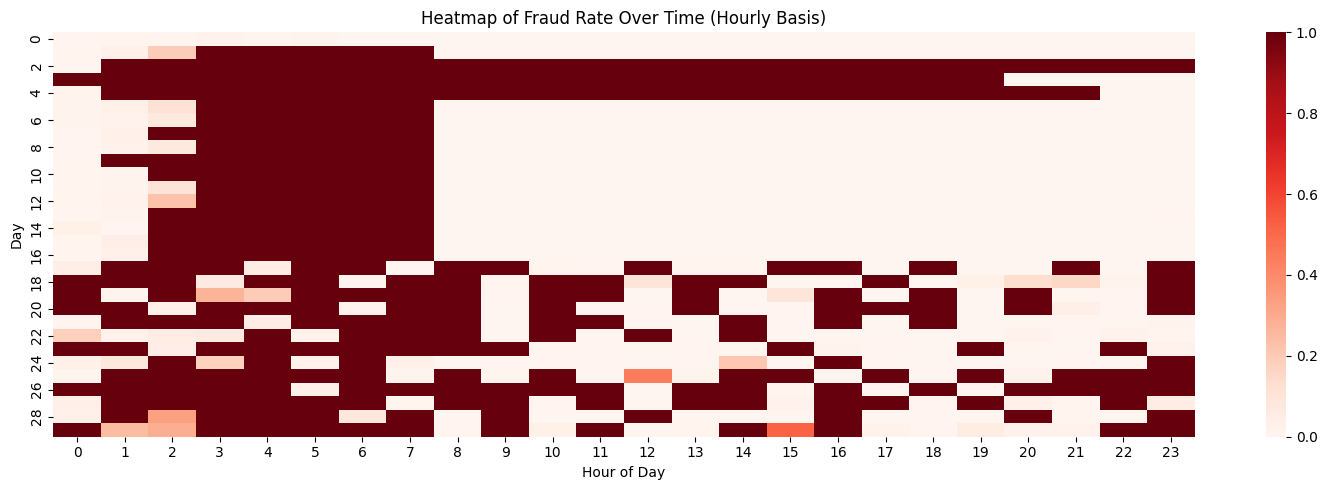

In [14]:
#TEMPORAL PATTERNS (The 'step' feature might indicate a time component.)
#(Analyzing transactions over time can reveal patterns like time-of-day or day-of-week trends in fraudulent activities.)

# Group by 'step' and calculate the fraud rate
grouped_data = data.groupby('step').agg({'isFraud': ['count', 'sum']})
grouped_data.columns = ['Total Transactions', 'Fraudulent Transactions']
grouped_data['Fraud Rate'] = grouped_data['Fraudulent Transactions'] / grouped_data['Total Transactions']

# Determine the number of complete days
total_hours = grouped_data.shape[0]
complete_days = total_hours // 24

# Trim the data to the nearest complete day
grouped_data_trimmed = grouped_data.head(complete_days * 24)

# Reshape the data into [days x hours]
fraud_rate_matrix = grouped_data_trimmed['Fraud Rate'].values.reshape(complete_days, 24)

# Create the heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(fraud_rate_matrix, cmap='Reds')
plt.title('Heatmap of Fraud Rate Over Time (Hourly Basis)')
plt.ylabel('Day')
plt.xlabel('Hour of Day')
plt.tight_layout()
plt.show()